# **Working with Geographic and Projected Coordinate System**
**Author: Krishnagopal Halder**
1. **Geographic Coordinate System:** The geographic coordinate system (GCS) uses a three-dimensional spherical surface to represent the Earth's shape. It is based on a datum, which defines the position and orientation of the coordinate system with respect to the Earth. The GCS uses angular units (degrees) to express coordinates. The most common GCS is the WGS84 (World Geodetic System 1984), which is widely used for global positioning and mapping purposes.

2. **Projected Coordinate System:** A projected coordinate system (PCS) is a two-dimensional Cartesian coordinate system that flattens the Earth's surface onto a flat map. It uses a map projection to transform the spherical coordinates into x-y coordinates. Map projections mathematically convert the curved Earth's surface onto a flat surface, introducing distortions in distance, shape, area, or direction.

<center><img src="https://developers.arcgis.com/geoanalytics/static/a13dabcadbf901b072baf212523a6658/29492/gcs-pcs-location.png"> </center>

This notebook provides an overview of how to work with geographic and projected coordinate systems using Python. Understanding coordinate systems is crucial for geospatial data analysis, mapping, and spatial analysis tasks. This guide introduces the concepts of geographic and projected coordinate systems and demonstrates how to perform coordinate system transformations, conversions, and visualizations using Python libraries.

## **01. Importing Required Libraries**

In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## **02. Setting Up the Working Directory**

In [2]:
# Checking the current working directory
print(os.getcwd())

D:\Coding\Git Repository\Geospatial_Data_Science_with_Python\01_Working_with_Projections


In [3]:
# Changing the current working directory
file_path = r"D:\Coding\Git Repository\Geospatial_Data_Science_with_Python\Datasets\Shapafiles"
os.chdir(file_path)
# Checking the current working directory
print(os.getcwd())

D:\Coding\Git Repository\Geospatial_Data_Science_with_Python\Datasets\Shapafiles


In [4]:
# Checking the files in the current working directory
print(os.listdir())

['ne_10m_land.cpg', 'ne_10m_land.dbf', 'ne_10m_land.prj', 'ne_10m_land.shp', 'ne_10m_land.shx', 'ne_10m_populated_places_simple.cpg', 'ne_10m_populated_places_simple.dbf', 'ne_10m_populated_places_simple.prj', 'ne_10m_populated_places_simple.shp', 'ne_10m_populated_places_simple.shx', 'ne_110m_graticules_10.cpg', 'ne_110m_graticules_10.dbf', 'ne_110m_graticules_10.prj', 'ne_110m_graticules_10.shp', 'ne_110m_graticules_10.shx']


## **03. Reading Shapefiles with GeoPandas**
GeoPandas is an open-source Python library that extends the capabilities of the popular data manipulation library, pandas, to handle geospatial data. It provides an easy and intuitive way to work with geospatial data, combining the power of pandas' data manipulation and analysis with the geometric operations and spatial functionality of other geospatial libraries, such as Shapely and Fiona.

In [5]:
# Reading a Natural Earth world shapefile with GeoPandas
world = gpd.read_file("ne_10m_land.shp")
# Reading a Natural Earth Populated Places Point shapefile
pop_cities = gpd.read_file("ne_10m_populated_places_simple.shp")

In [6]:
# Checking the first five rows of the populated places dataset
pop_cities.head()

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,...,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
0,10,1,8.0,Admin-1 capital,Colonia del Sacramento,NaN,NaN,Colonia del Sacramento,0,0,...,21714,21714,0.0,7,7,NaN,NaN,9.0,1159112629,POINT (-57.83612 -34.46979)
1,10,1,8.0,Admin-1 capital,Trinidad,NaN,NaN,Trinidad,0,0,...,21093,21093,0.0,7,7,NaN,NaN,9.0,1159112647,POINT (-56.90100 -33.54400)
2,10,1,8.0,Admin-1 capital,Fray Bentos,NaN,NaN,Fray Bentos,0,0,...,23279,23279,0.0,7,7,NaN,NaN,9.0,1159112663,POINT (-58.30400 -33.13900)
3,10,1,8.0,Admin-1 capital,Canelones,NaN,NaN,Canelones,0,0,...,19698,19698,0.0,6,6,NaN,NaN,9.0,1159112679,POINT (-56.28400 -34.53800)
4,10,1,8.0,Admin-1 capital,Florida,NaN,NaN,Florida,0,0,...,32234,32234,0.0,7,7,NaN,NaN,7.0,1159112703,POINT (-56.21500 -34.09900)


In [7]:
# Extracting the Admin-0 capitals only
capitals = pop_cities[pop_cities["featurecla"]=="Admin-0 capital"]

In [8]:
# Checking the Admin-0 capitals
capitals.head()

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,...,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
880,8,10,3.0,Admin-0 capital,Vatican City,NaN,NaN,Vatican City,1,0,...,832,832,562430.0,2,2,NaN,Vatican City,7.0,1159127243,POINT (12.45339 41.90328)
4828,7,20,0.0,Admin-0 capital,San Marino,NaN,NaN,San Marino,1,0,...,29579,29000,0.0,7,7,NaN,San Marino,6.1,1159146051,POINT (12.44177 43.93610)
4833,7,20,0.0,Admin-0 capital,Vaduz,NaN,NaN,Vaduz,1,0,...,36281,5342,33009.0,7,5,NaN,Vaduz,6.7,1159146061,POINT (9.51667 47.13372)
5012,6,30,8.0,Admin-0 capital,Luxembourg,NaN,NaN,Luxembourg,1,0,...,107260,76684,106219.0,9,8,NaN,Luxembourg,6.0,1159146437,POINT (6.13000 49.61166)
6178,6,30,0.0,Admin-0 capital,Palikir,NaN,NaN,Palikir,1,0,...,4645,4645,0.0,4,4,NaN,Palikir,6.0,1159149061,POINT (158.14997 6.91664)


In [9]:
# Reading a Natural Earth 10m interval Graticules shapefile
grat = gpd.read_file("ne_110m_graticules_10.shp")

## **04. Checking the Metadata of the CRS**

In [10]:
# Checking the CRS metadata of the world shapefile
world.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
# Checking the CRS metadata of the cities shapefile
capitals.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
# Checking the CRS metadata of the graticules shapefile
grat.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
# Checking if all the shapefiles are in same CRS or not
world.crs == capitals.crs == grat.crs

True

## **05. Plotting the Shapefiles in a Map**

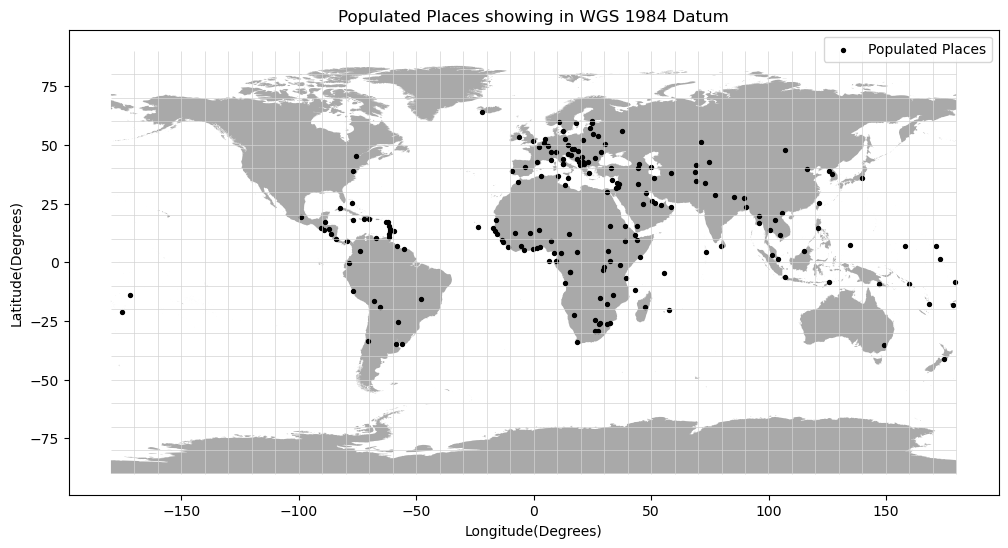

In [56]:
fig, ax = plt.subplots(figsize=(12, 10))
world.plot(ax=ax, color="darkgray")
capitals.plot(ax=ax, color="black", markersize=8, label="Populated Places")
grat.plot(ax=ax, color="lightgray", linewidth=0.5)
ax.set(xlabel="Longitude(Degrees)", ylabel="Latitude(Degrees)", title="Populated Places showing in WGS 1984 Datum")
plt.legend()
plt.show()

## **06. Reprojecting the Data**
Reprojection, also known as coordinate transformation or coordinate conversion, refers to the process of converting spatial data from one coordinate system to another. It involves transforming the coordinates of geographic features from their original reference system to a different reference system, often with a different datum or projection.

Reprojection is necessary when working with geospatial data that is collected, stored, or analyzed in different coordinate systems. Each coordinate system has its own set of parameters, such as the datum, map projection, units of measurement, and spatial reference. Reprojection ensures that different datasets or layers align properly and can be integrated or overlaid accurately in a consistent spatial reference system.

In [44]:
# Reprojecting the data from WGS 1984 CRS to Azimuthal Equidistant Projection
world_ae = world.to_crs("ESRI:54032")
capitals_ae = capitals.to_crs("ESRI:54032")
grat_ae = grat.to_crs("ESRI:54032")

In [47]:
# Checking the reprojected CRS
world_ae.crs

<Projected CRS: ESRI:54032>
Name: World_Azimuthal_Equidistant
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Azimuthal_Equidistant
- method: Modified Azimuthal Equidistant
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [49]:
capitals_ae.crs

<Projected CRS: ESRI:54032>
Name: World_Azimuthal_Equidistant
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Azimuthal_Equidistant
- method: Modified Azimuthal Equidistant
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [50]:
grat_ae.crs

<Projected CRS: ESRI:54032>
Name: World_Azimuthal_Equidistant
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Azimuthal_Equidistant
- method: Modified Azimuthal Equidistant
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## **07. Plotting the Reprojected Shapefiles in a Map**

In [63]:
# Creating a function that will take the files and plot them in a map
def plot_map_layers(gdf_1, gdf_2, gdf_3, title, unit, legend):
    fig, ax = plt.subplots(figsize=(12, 10))
    gdf_1.plot(ax=ax, color="darkgray")
    gdf_2.plot(ax=ax, color="black", markersize=8, label=legend)
    gdf_3.plot(ax=ax, color="lightgray", linewidth=0.5)
    ax.set(xlabel="X Coordinate-" + unit,
           ylabel="Y Coordinate-" + unit,
           title=title
           )
    plt.legend()
    plt.show()

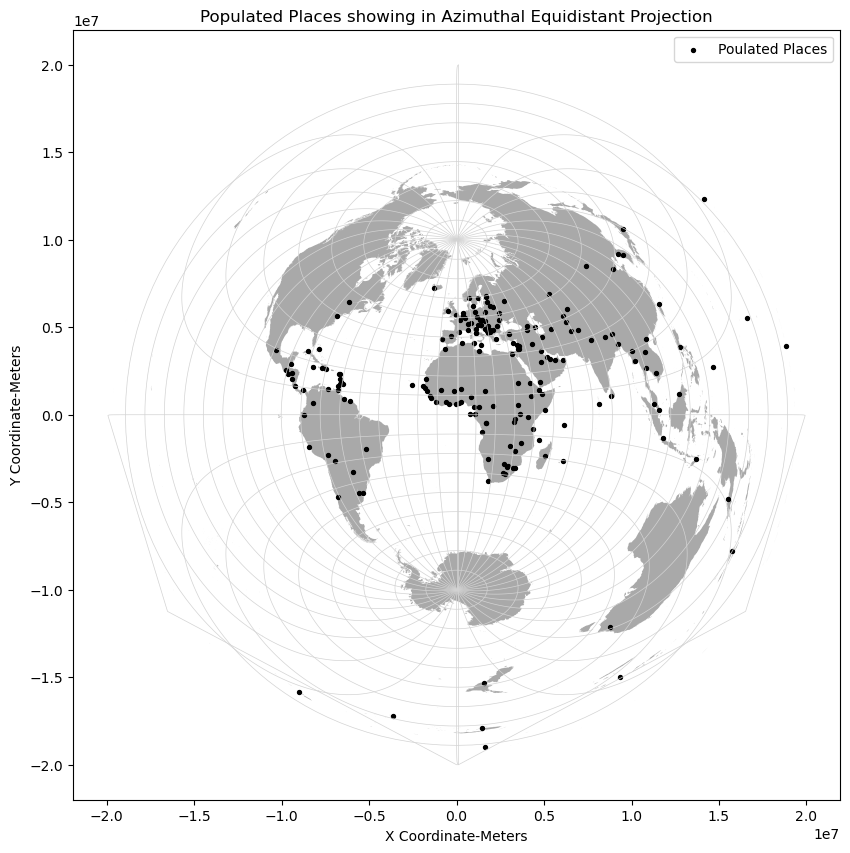

In [64]:
# Using the function to plot the map
map_title = "Populated Places showing in Azimuthal Equidistant Projection"
plot_map_layers(world_ae, capitals_ae, grat_ae, map_title, "Meters", "Poulated Places")